# Natural Language Processing

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Tweets.csv', delimiter = ',')
dataset['text'] = dataset['text'].astype(str)

## Cleaning the texts

In [3]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, len(dataset)):
  tweet = re.sub('[^a-zA-Z]', ' ', dataset['text'][i])
  tweet = tweet.lower()
  tweet = tweet.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  all_stopwords.remove('no')
  tweet = [ps.stem(word) for word in tweet if not word in set(all_stopwords)]
  tweet = ' '.join(tweet)
  corpus.append(tweet)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
print(corpus)

['respond go', 'sooo sad miss san diego', 'boss bulli', 'interview leav alon', 'son put releas alreadi bought', 'http www dothebounci com smf shameless plug best ranger forum earth', 'feed babi fun smile coo', 'soooo high', '', 'journey wow u becam cooler hehe possibl', 'much love hope reckon chanc minim p never gonna get cake stuff', 'realli realli like song love stori taylor swift', 'sharpi run danger low ink', 'want go music tonight lost voic', 'test test lg env', 'uh oh sunburn', 'ok tri plot altern speak sigh', 'sick past day thu hair look wierd didnt hat would look http tinyurl com mnf kw', 'back home gonna miss everi one', 'he not', 'oh marli sorri hope find soon', 'play ghost onlin realli interest new updat kirin pet metamorph third job wait dragon pet', 'clean hous famili com later today', 'gotta restart comput thought win suppos put end constant rebooti', 'see wat mean bout foll w friiday call lose f llower friday smh', 'free fillin app ipod fun im addict', 'sorri', 'way mala

## Creating the Bag of Words model

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 3000)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Training the Logistic Regression model on the Training set

In [7]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

## Predicting the Test set results

In [8]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [1 0]
 ...
 [0 1]
 [0 0]
 [0 0]]


## Predicting if a single tweet is happy or not

In [9]:
new_tweet = 'I love this book so much'
new_tweet = re.sub('[^a-zA-Z]', ' ', new_tweet)
new_tweet = new_tweet.lower()
new_tweet = new_tweet.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_tweet = [ps.stem(word) for word in new_tweet if not word in set(all_stopwords)]
new_tweet = ' '.join(new_tweet)
new_corpus = [new_tweet]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = classifier.predict(new_X_test)
print(new_y_pred)

[1]


## The Confusion Matrix and Performance Metrics

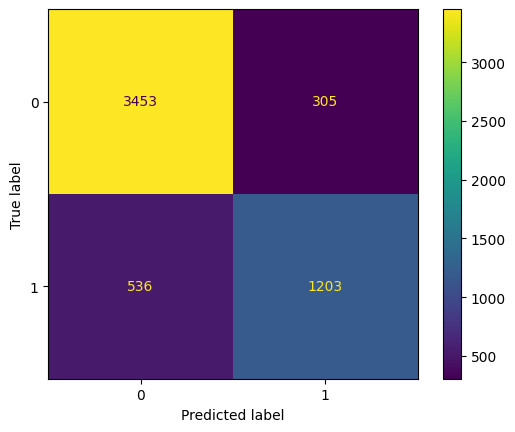


Accuracy score = 84.701%
Precision = 79.775%
Recall = 69.178%
F1 Score = 74.099%


In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()
print()

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score = {accuracy*100:.3f}%")

precision = precision_score(y_test, y_pred)
print(f"Precision = {precision*100:.3f}%")

recall = recall_score(y_test, y_pred)
print(f"Recall = {recall*100:.3f}%")

f1 = f1_score(y_test, y_pred)
print(f"F1 Score = {f1*100:.3f}%")